![Degirum banner](https://raw.githubusercontent.com/DeGirum/PySDKExamples/main/images/degirum_banner.png)
## Performance Test for Single-Model Inference
This notebook contains performance measurements for all Orca-based image detection AI models from DeGirum 
public model zoo

This script works with the following inference options:

1. Run inference on DeGirum Cloud Platform;
2. Run inference on DeGirum AI Server deployed on a localhost or on some computer in your LAN or VPN;
3. Run inference on DeGirum ORCA accelerator directly installed on your computer.

To try different options, you need to specify the appropriate `hw_location` option.

When running this notebook locally, you need to specify your cloud API access token in the [env.ini](../../env.ini) file, located in the same directory as this notebook.

When running this notebook in Google Colab, the cloud API access token should be stored in a user secret named `DEGIRUM_CLOUD_TOKEN`.

In [37]:
# make sure degirum-tools package is installed
!pip show degirum-tools || pip install degirum-tools

/bin/bash: /home/gotom/anaconda3/envs/degirum_test/lib/python3.9/site-packages/cv2/../../../../lib/libtinfo.so.6: no version information available (required by /bin/bash)
Name: degirum-tools
Version: 0.4.0
Summary: Tools for PySDK
Home-page: 
Author: DeGirum
Author-email: 
License: 
Location: /home/gotom/anaconda3/envs/degirum_test/lib/python3.9/site-packages
Requires: av, degirum, ipython, numpy, opencv-python, pafy, pillow, pycocotools, pyyaml, scipy, youtube-dl
Required-by: 


#### Specify test options here

In [38]:
# hw_location: where you want to run inference
#     "@cloud" to use DeGirum cloud
#     "@local" to run on local machine
#     IP address for AI server inference
# model_zoo_url: url/path for model zoo
#     cloud_zoo_url: valid for @cloud, @local, and ai server inference options
#     '': ai server serving models from local folder
#     path to json file: single model zoo in case of @local inference
# iterations: iterations to run for each model
# device_family: device family of models to profile
hw_location = "@cloud"
#hw_location = "@local"

#model_zoo_url = "https://cs.degirum.com/degirum/public"
model_zoo_url = "https://cs.degirum.com/degirum/ultralytics_v6"
iterations = 10  # how many iterations to run for each model
device_family = "ORCA1"  # models of which device family to use

#### Specify where do you want to run your inferences

In [39]:
import degirum as dg
import degirum_tools

# connect to AI inference engine
zoo = dg.connect(hw_location, model_zoo_url, degirum_tools.get_token())

In [40]:
#*******************************************************************************************************
# draw_graph()
#*******************************************************************************************************
def draw_graph(data_dir, fps1D, fps2D, label1, label2, graph_title, y_max, suffix):

    import matplotlib.pyplot as plt
        
    model_symbolsL = []
    fps1L = []
    fps2L = []
    
    for k, v in fps1D.items():
        model_symbolsL.append(k) 
        fps1L.append(v)
    
    for k, v in fps2D.items():
        fps2L.append(v)

    fig = plt.figure()
    ax1 = fig.add_subplot(111)

    plt.rcParams["font.family"] = "Dejavu Serif"
    plt.rcParams["font.size"] = 14
    plt.rcParams["lines.linewidth"] = 1.5

    plt.grid()
    font = {'family' : 'Dejavu Serif',
            'size' : 14,
    }

    ax1.set_ylim(0, y_max)
    #plt.xticks[x, model_symbolsL]
    x = model_symbolsL
    
    ax1.plot(x, fps1L, color = 'lightblue', label = label1, marker = 'D', markersize = 4, 
             markeredgewidth = 1.5, markeredgecolor = 'skyblue', markerfacecolor = 'lightblue')
    
    for i, value in enumerate(fps1L):
        ax1.text(x[i], fps1L[i], value, size = 12, ha = 'left', va = 'bottom', color = 'black')
    
    ax1.plot(x, fps2L, color = 'yellowgreen', label = label2, marker = 'D', markersize = 4, 
              markeredgewidth = 1.5, markeredgecolor = 'lime', markerfacecolor = 'yellowgreen')
    
    for i, value in enumerate(fps2L):
         ax1.text(x[i], fps2L[i], value, size = 12, ha = 'right', va = 'bottom', color = 'black')
    
    ax1.set_xlabel('Model Name', fontdict=font)
    ax1.set_ylabel('FPS', fontdict=font)

    ax1.legend(loc = 'upper center')
    
    plt.title(graph_title)
    #plt.xticks(rotation=90)
    plt.rcParams['figure.figsize'] = (16.0, 6.0)
    plt.show()
    fig.savefig(data_dir + graph_title +'_' + suffix + '.jpg')

In [41]:
target_models = [
                'yolov5nu_relu6_coco--640x640_quant_n2x_orca1_1',
                'yolov5su_relu6_coco--640x640_quant_n2x_orca1_1',
                'yolov8n_relu6_coco--640x640_quant_n2x_orca1_1',
                'yolov8s_relu6_coco--640x640_quant_n2x_orca1_1',
                'yolov5nu_relu6_coco--640x640_quant_tflite_edgetpu_1',
                'yolov5su_relu6_coco--640x640_quant_tflite_edgetpu_1',
                'yolov8n_relu6_coco--640x640_quant_tflite_edgetpu_1',
                'yolov8s_relu6_coco--640x640_quant_tflite_edgetpu_1',
                ]

In [42]:
# target_models = [
#                 'yolov5nu_relu6_face--640x640_quant_n2x_orca1_1',
#                 'yolov5su_relu6_face--640x640_quant_n2x_orca1_1',
#                 'yolov8n_relu6_face--640x640_quant_n2x_orca1_1',
#                 'yolov8s_relu6_face--640x640_quant_n2x_orca1_1',
#                 'yolov5nu_relu6_face--640x640_quant_tflite_edgetpu_1',
#                 'yolov5su_relu6_face--640x640_quant_tflite_edgetpu_1',
#                 'yolov8n_relu6_face--640x640_quant_tflite_edgetpu_1',
#                 'yolov8s_relu6_face--640x640_quant_tflite_edgetpu_1',
#                 ]

In [43]:
# target_models = [
#                 'yolov5n_relu6_visdrone--640x640_quant_n2x_orca1_1',
#                 'yolov5s_relu6_visdrone--640x640_quant_n2x_orca1_1',
#                 'yolov8n_relu6_visdrone--640x640_quant_n2x_orca1_1',
#                 'yolov8s_relu6_visdrone--640x640_quant_n2x_orca1_1',
#                 'yolov5n_relu6_visdrone--640x640_quant_tflite_edgetpu_1',
#                 'yolov5s_relu6_visdrone--640x640_quant_tflite_edgetpu_1',
#                 'yolov8n_relu6_visdrone--640x640_quant_tflite_edgetpu_1',
#                 'yolov8s_relu6_visdrone--640x640_quant_tflite_edgetpu_1',
#                 ]

In [44]:
#model_symbol = ['yolov5n_relu6_visdrone', 'yolov5s_relu6_visdrone', 'yolov8n_relu6_visdrone', 'yolov8s_relu6_visdrone',]
model_symbol = ['yolov5n_relu6_coco', 'yolov5s_relu6_coco', 'yolov8n_relu6_coco', 'yolov8s_relu6_coco',]
#model_symbol = ['yolov5n_relu6_face', 'yolov5s_relu6_face', 'yolov8n_relu6_face', 'yolov8s_relu6_face',]

#### The rest of the cells below should run without any modifications

In [45]:
# run batch predict for each model and record time measurements
results = {}
iterations = 100
prog = degirum_tools.Progress(len(target_models), speed_units="models/s")
for model_name in target_models:
    try:
        results[model_name] = degirum_tools.model_time_profile(
            zoo.load_model(model_name), iterations
        )
    except NotImplementedError:
        pass  # skip models for which time profiling is not supported
    prog.step()

 100% |███████████████| 8/8 [1101.3s elapsed, 0.0s remaining, 0.0 models/s]

In [46]:
# print results
CW = (15, 65, 16, 16)  # column widths
header = f"{'Device':{CW[0]}} | {'Model name':{CW[1]}} | {'Observed FPS':{CW[2]}} | {'Max Possible FPS':{CW[3]}} |"

#print(f"Models    : {len(target_models)}")
print(f"Iterations: {iterations}")
print(f"{'-'*len(header)}")
print(header)
print(f"{'-'*len(header)}")

orca_observed_fpsL = []
edgetpu_observed_fpsL = []

for model_name, result in results.items():
    if model_name.find('orca1') > 0:
        device = 'ORCA'
        orca_observed_fpsL.append(round(result.observed_fps,1))
    elif model_name.find('edgetpu') > 0:
        device = 'EDGETPU'
        edgetpu_observed_fpsL.append(round(result.observed_fps,1))
    print(
        f'{device:{CW[0]}} |'
        + f" {model_name:{CW[1]}} |"
        + f" {result.observed_fps:{CW[2]}.1f} |"
        + f" {result.max_possible_fps:{CW[3]}.1f} |"
    )
print(f"{'_'*len(header)}")

Iterations: 100
---------------------------------------------------------------------------------------------------------------------------
Device          | Model name                                                        | Observed FPS     | Max Possible FPS |
---------------------------------------------------------------------------------------------------------------------------
ORCA            | yolov5nu_relu6_coco--640x640_quant_n2x_orca1_1                    |             70.1 |             97.8 |
ORCA            | yolov5su_relu6_coco--640x640_quant_n2x_orca1_1                    |             38.0 |             43.7 |
ORCA            | yolov8n_relu6_coco--640x640_quant_n2x_orca1_1                     |             66.9 |             91.0 |
ORCA            | yolov8s_relu6_coco--640x640_quant_n2x_orca1_1                     |             33.2 |             37.2 |
EDGETPU         | yolov5nu_relu6_coco--640x640_quant_tflite_edgetpu_1               |              0.8 |            

In [47]:
orca_observed_fpsD = {}
edgetpu_observed_fpsD = {}

for i, fps in enumerate(orca_observed_fpsL):
    orca_observed_fpsD[model_symbol[i]] = fps

#print (f'orca_observed_fpsD: {orca_observed_fpsD}')

for i, fps in enumerate(edgetpu_observed_fpsL):
    #print(f'fps = {fps}')
    edgetpu_observed_fpsD[model_symbol[i]] = fps

#print (f'edgetpu_observed_fpsD: {edgetpu_observed_fpsD}')

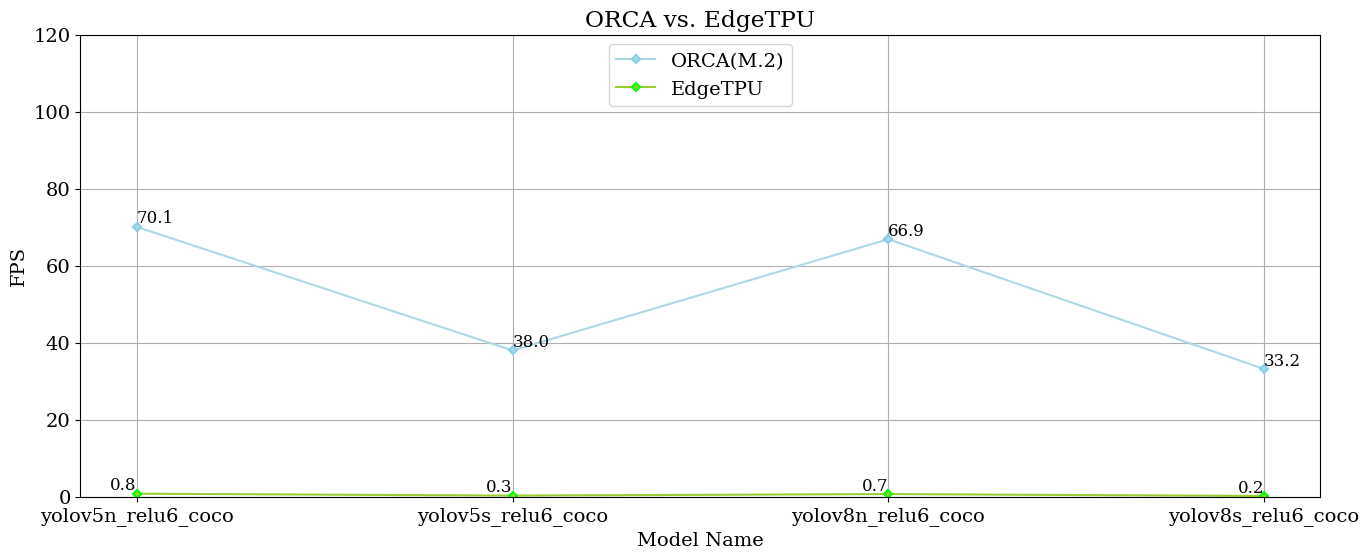

In [48]:
import time
data_dir = './data_dir/benchmark/vs_edgetpu/'
label1 = 'ORCA(M.2)'
label2 = 'EdgeTPU'
graph_title = 'ORCA vs. EdgeTPU'
y_max = 120

suffix = time.strftime('%m%d%H%M')

draw_graph(data_dir, orca_observed_fpsD, edgetpu_observed_fpsD, label1, label2, graph_title, y_max, suffix)


In [49]:
""" # save results
import time
d = time.strftime('%m%d%H%M')
data_dir = 'data_dir/benchmark/vs_edgetpu/'

f = open(data_dir + 'orca_vs_edgetpu' + d + '.txt', 'w')
CW = (62, 19, 16, 16)  # column widths
header = f"{'Model name':{CW[0]}}| {'Postprocess Type':{CW[1]}} | {'Observed FPS':{CW[2]}} | {'Max Possible FPS':{CW[3]}} |"

f.write(f"Models    : {len(target_models)}\n")
f.write(f"Iterations: {iterations}\n")
f.write(f"{'-'*len(header)}\n")
f.write(header + '\n')
f.write(f"{'-'*len(header)\n}")

for model_name, result in results.items():
    print(
        f"{model_name:{CW[0]}}|"
        + f" {result.parameters.OutputPostprocessType:{CW[1]}} |"
        + f" {result.observed_fps:{CW[2]}.1f} |"
        + f" {result.max_possible_fps:{CW[3]}.1f} |"
    ) """

' # save results\nimport time\nd = time.strftime(\'%m%d%H%M\')\ndata_dir = \'data_dir/benchmark/vs_edgetpu/\'\n\nf = open(data_dir + \'orca_vs_edgetpu\' + d + \'.txt\', \'w\')\nCW = (62, 19, 16, 16)  # column widths\nheader = f"{\'Model name\':{CW[0]}}| {\'Postprocess Type\':{CW[1]}} | {\'Observed FPS\':{CW[2]}} | {\'Max Possible FPS\':{CW[3]}} |"\n\nf.write(f"Models    : {len(target_models)}\n")\nf.write(f"Iterations: {iterations}\n")\nf.write(f"{\'-\'*len(header)}\n")\nf.write(header + \'\n\')\nf.write(f"{\'-\'*len(header)\n}")\n\nfor model_name, result in results.items():\n    print(\n        f"{model_name:{CW[0]}}|"\n        + f" {result.parameters.OutputPostprocessType:{CW[1]}} |"\n        + f" {result.observed_fps:{CW[2]}.1f} |"\n        + f" {result.max_possible_fps:{CW[3]}.1f} |"\n    ) '